In [2]:
from utils.plot.import_library_plot import *
import numpy as np
import matplotlib.pyplot as plt
from utils.functions import save_object, load_object
from utils.model_prior_real_data import Model_Prior

## Functions

In [3]:
def run_demo(model='inpainting', data='mnist', category=0, n_rem=1, Delta=0.01,
             seed=0, max_iter=1000,
             plot_prior_sample=False, plot_truth_vs_pred=False,
             plot_evolution=False, save_fig=False, block=False):
    
    ## Choose Model ##
    if model == 'inpainting':
        model_params = {'name': 'inpainting',
                        'N': 784, 'N_rem': n_rem, 'alpha': 0, 'type': 'random'}
    elif model == 'denoising':
        model_params = {'name': 'denoising',
                        'N': 784, 'alpha': 0}
    else:
        raise NotImplementedError('Models avalable for demonstration: [inpainting, denoising]')

    ## Choose Data ##
    if data in ['mnist', 'fashion_mnist']:
        data_params = {'name': data, 'category': category}
        prior_params = {'name': 'VAE', 'type': data,
                        'id': '20_relu_400_sigmoid_784_bias'}
    else:
        raise NotImplementedError('Dataset available for demonstration: [mnist, fashion_mnist]')

    ## Run EP ##
    EP = Model_Prior(model_params=model_params, data_params=data_params,
                     prior_params=prior_params, Delta=Delta, seed=seed,
                     plot_prior_sample=plot_prior_sample, plot_truth_vs_pred=plot_truth_vs_pred)
    EP.setup()
    output, output_tracking = EP.run_ep(
        max_iter=max_iter, check_decreasing=False)
    mse_ep, mse = EP.compute_mse(output)

    if model == 'inpainting':
        EP.y_true['y'] = EP.y_inp
        
    dic = {'model': model, 'Delta': Delta, 'n_rem': n_rem, 'category': category, 'seed': seed,
           'y': EP.y_true['y'], 'x': EP.x_true['x'], 'x_pred': EP.x_pred['x']}

    return dic

In [4]:
def plot_VAE(dic, save_fig=False):
    _, axes = plt.subplots(1, 3)
    cmap = 'gray'
    axes[0].imshow(dic['x'].reshape(28, 28), cmap=cmap, vmin=-1, vmax=1)
    axes[1].imshow(dic['y'].reshape(28, 28), cmap=cmap,vmin=np.min(dic['y']), vmax=np.max(dic['y']))
    axes[2].imshow(dic['x_pred'].reshape(28, 28), cmap=cmap, vmin=-1, vmax=1)

    """ Titles  """
    axes[0].set_title(r'$x^*$')
    axes[1].set_title(r'$y$')
    axes[2].set_title(r'$\hat{x}$')

    """ Ticks   """
    axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].set_xticks([]), axes[1].set_yticks([])
    axes[2].set_xticks([]), axes[2].set_yticks([])

    """ Save   """
    if save_fig:
        dir_fig = 'Figures/'
        os.makedirs(dir_fig) if not os.path.exists(dir_fig) else 0
        file_name = f'{dir_fig}{dic["model"]}_Delta={dic["Delta"]:.0f}_nrem={dic["n_rem"]:.0f}_cat={dic["category"]}_seed={dic["seed"]}.pdf'

        plt.tight_layout()
        plt.savefig(file_name, format='pdf', dpi=1000,
                    bbox_inches="tight", pad_inches=0.1)

    """ Show   """
    plt.show()

mse_ep: 0.001 mse:  0.117


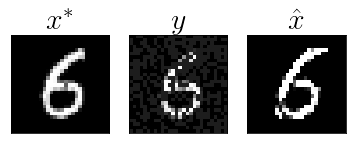

In [5]:
## Parameters ##
model, Delta, n_rem= 'inpainting', 1e-2, 50
data, category = 'mnist', 6
seed = 1
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.002 mse:  0.040


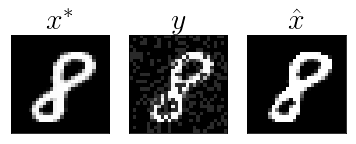

In [6]:
model, Delta, n_rem= 'inpainting', 1e-2, 30
data, category = 'mnist', 8

seed = 5
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.127 mse:  0.082


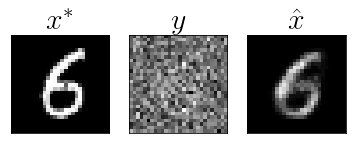

In [7]:
model, Delta, n_rem= 'denoising', 4, 0
data, category = 'mnist', 6
seed = 1
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.109 mse:  0.051


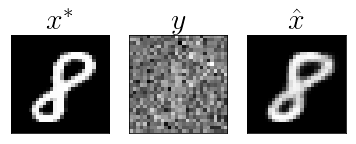

In [8]:
model, Delta, n_rem= 'denoising', 4, 0
data, category = 'mnist', 8
seed = 5
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic)

mse_ep: 0.093 mse:  0.143


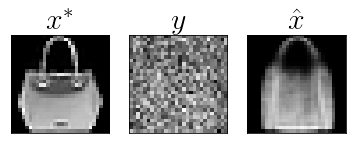

In [9]:
model, Delta, n_rem= 'denoising', 4, 0
data, category = 'fashion_mnist', 8
seed = 1
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.079 mse:  0.123


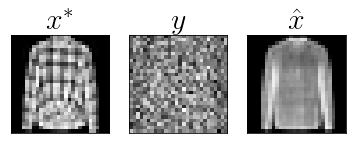

In [10]:
model, Delta, n_rem= 'denoising', 4, 0
data, category = 'fashion_mnist', 6
seed = 1
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.081 mse:  0.091


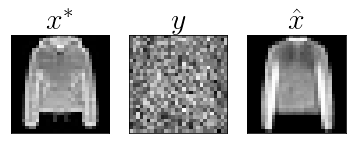

In [11]:
model, Delta, n_rem= 'denoising', 4, 0
data, category = 'fashion_mnist', 4
seed = 1
dic = run_demo(model=model, data=data, category=category, max_iter=1000, n_rem=n_rem, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)